Nama: Agil Rahmat

NIM: 2106037

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

dataset = pd.read_csv('Starbukcs.csv')
print('sample data:')
dataset.head()

sample data:


,calories,fat,carb,fiber,protein,item
0,350.0,8.0,67.0,5.0,10.0,8-Grain Roll
1,350.0,9.0,64.0,7.0,6.0,Apple Bran Muffin
2,420.0,20.0,59.0,0.0,5.0,Apple Fritter
3,490.0,19.0,75.0,4.0,7.0,Banana Nut Loaf
4,130.0,6.0,17.0,0.0,0.0,Birthday Cake Mini Doughnut


In [3]:
dataset.isna().sum()

calories    0
fat         0
carb        0
fiber       0
protein     0
item        0
dtype: int64

In [4]:
dataset.dtypes

calories    float64
fat         float64
carb        float64
fiber       float64
protein     float64
item         object
dtype: object

In [5]:
x = dataset.iloc[:, :4]
y = dataset['item']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

In [6]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [7]:
print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy: 0.000


[Text(0.05351170568561873, 0.9807692307692307, 'x[2] <= 16.5\ngini = 0.981\nsamples = 53\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.026755852842809364, 0.9423076923076923, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.0802675585284281, 0.9423076923076923, 'x[2] <= 18.5\ngini = 0.981\nsamples = 52\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.05351170568561873, 0.9038461538461539, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0,

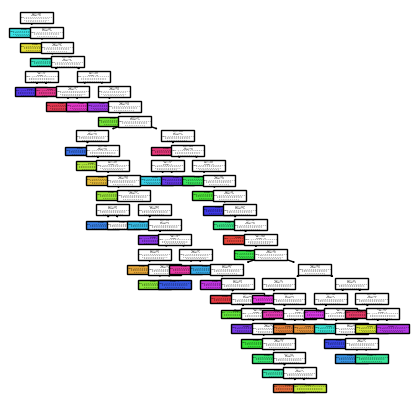

In [8]:
plt.figure(figsize=(5,5))
tree.plot_tree(dt, filled=True)

In [9]:
kMeans = KMeans(n_clusters=3)
labels = kMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

0.5255795075161578


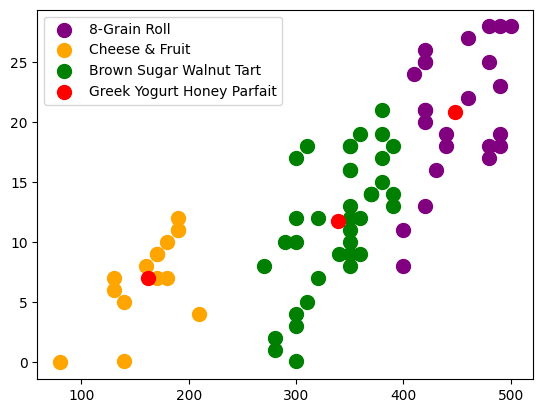

In [18]:
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],x.loc[labels == 0, cols[1]],s=100, c='purple',label='8-Grain Roll')
plt.scatter(x.loc[labels == 1, cols[0]],x.loc[labels == 1, cols[1]],s=100, c='orange',label='Cheese & Fruit')
plt.scatter(x.loc[labels == 2, cols[0]],x.loc[labels == 2, cols[1]],s=100, c='green',label='Brown Sugar Walnut Tart')
plt.scatter(kMeans.cluster_centers_[:, 0],kMeans.cluster_centers_[:, 1], s=100, c='red', label='Greek Yogurt Honey Parfait')

plt.legend()